In [1]:
import json
%matplotlib inline   

In [2]:
path = 'ch02/usagov_bitly_data2012-03-16-1331923249.txt'
records = [json.loads(line) for line in open(path)]

Need to check if the record have tz key in python dict

In [3]:
timezones = [rec['tz'] for rec in records if 'tz' in rec]

In [4]:
from collections import defaultdict
def get_counts(sequence):
    counts = defaultdict(int)  #all value will be initilized as 0
    for x in sequence:
        counts[x] += 1
    return counts

In [5]:
result = get_counts(timezones)
result['America/New_York']
# find the first ten timezones
def top_counts(count_dict, top=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-top:]
top_ten_timezone = top_counts(result)
top_ten_timezone

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

Another way to find the top 10 timezone by using collection.counter

In [6]:
from collections import Counter
counts = Counter(timezones)
counts.most_common(10)   #list the most common elements and their counts

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

### Using Pandas to do the count problem

In [7]:
import pandas as pd
import numpy as np

In [8]:
frame = pd.DataFrame(records)
frame['tz']     # It is a serie which has a value_counts function 
                # (also a one-dimensional ndarray)
tz_count = frame['tz'].value_counts()
tz_count[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

#### Draw the timezone 

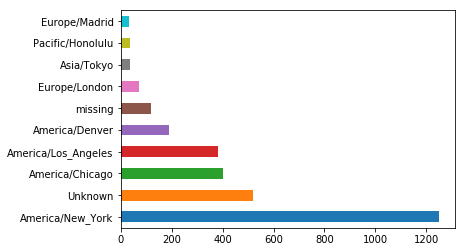

In [9]:
# use the fillna to fill nan value as missing 
clean_tz = frame['tz'].fillna('missing') 
# using boolean index to find the na
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
# use .plot to plot, rot is the rotation of the title
tz_counts[:10].plot(kind='barh', rot=0)


In [10]:
browser_result = pd.Series([x.split()[0] for x in frame.a.dropna()])  # drop the nan value 
browser_result.value_counts()
browser_result[:10]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
5               Mozilla/5.0
6               Mozilla/5.0
7               Mozilla/5.0
8                Opera/9.80
9               Mozilla/5.0
dtype: object

find all windows and no windows user

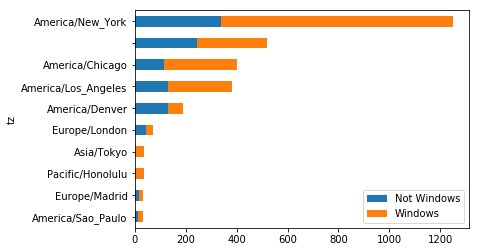

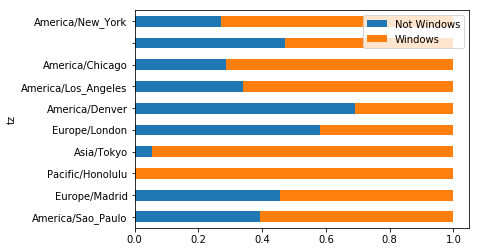

In [11]:
# using boolean index to delete the null value row 
cframe = frame[frame.a.notnull()]
# np.where return either x or y depending on condition
operating_system = np.where(cframe.a.str.contains('Windows'), 'Windows', 'Not Windows')
# group the time zone by operating system
by_tz_os = cframe.groupby(['tz', operating_system])
# use unstack() function to reconstruct the data, size function is just like value_counts
agg_counts = by_tz_os.size().unstack().fillna(0)
# argsort() Returns the indices that would sort an array.
# axis { index (0), column (1) }
indexer = agg_counts.sum(1).argsort()
# take return the elements in the given positional indices along an axis
count_subset = agg_counts.take(indexer)[-10:]
count_subset.plot(kind='barh', stacked=True)
# normalize the data, axis is used to match the series index on
normed_subset = count_subset.div(count_subset.sum(1), axis=0)
normed_subset.plot(kind='barh', stacked=True)

### MoviLens Data Analysis

In [12]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
# read data from table, names is the column names to use
users = pd.read_table('ch02/movielens/users.dat', sep='::', header=None, names=unames)
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ch02/movielens/ratings.dat', sep='::', header=None, names=rnames)
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ch02/movielens/movies.dat', sep='::', header=None, names=mnames)
print(users[:5])
print(ratings[:5])
print(movies[:5])

/home/gordontttt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gordontttt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


   user_id gender  age  occupation    zip
0        1      F    1          10  48067
1        2      M   56          16  70072
2        3      M   25          15  55117
3        4      M   45           7  02460
4        5      M   25          20  55455
   user_id  movie_id  rating  timestamp
0        1      1193       5  978300760
1        1       661       3  978302109
2        1       914       3  978301968
3        1      3408       4  978300275
4        1      2355       5  978824291
   movie_id                               title                        genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy


/home/gordontttt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys


In [13]:
# Use merge command to merge table, pandas will automatically 
# recognize the duplicate key by name
data = pd.merge(pd.merge(users, ratings), movies)
# iloc is located by index (0 to length - 1)
data.iloc[0]
# pivot_table will create a speadsheet pivot table by aggreation function
mean_ratings = data.pivot_table(values='rating', index='title', columns='gender', aggfunc='mean')
mean_ratings

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
1-900 (1994),2.000000,3.000000
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215


In [14]:
rating_by_title = data.groupby('title').size() #size function is just like value_counts
# just need the index, don't need the count number and only get the index
active_titles = rating_by_title.index[rating_by_title >= 250]
# loc will accsss a group of rows and columns by labels or a boolean array
mean_ratings = mean_ratings.loc[active_titles]
# sort object by labels (along an axis)
top_female_ratings = mean_ratings.sort_index(by='F', ascending=False)
top_female_ratings[:5]
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']
sorted_by_diff = mean_ratings.sort_index(by='diff')
sorted_by_diff[:5]
# using ::-1 to reverse the data frame
sorted_by_diff[::-1][:15]

/home/gordontttt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  import sys
/home/gordontttt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  # Remove the CWD from sys.path while we load stuff.


gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


In [15]:
# use std to calculate the standard difference 
rating_by_diff = data.groupby('title')['rating'].std()
rating_by_diff = rating_by_diff.loc[active_titles]
# use sort_values to sort the series
rating_by_diff.sort_values(ascending=False)
rating_by_diff[:10]

title
'burbs, The (1989)                     1.107760
10 Things I Hate About You (1999)      0.989815
101 Dalmatians (1961)                  0.982103
101 Dalmatians (1996)                  1.098717
12 Angry Men (1957)                    0.812731
13th Warrior, The (1999)               1.140421
2 Days in the Valley (1996)            0.921592
20,000 Leagues Under the Sea (1954)    0.869685
2001: A Space Odyssey (1968)           1.042504
2010 (1984)                            0.946618
Name: rating, dtype: float64

## Babies' Name

In [16]:
names1880 = pd.read_csv('ch02/names/yob1880.txt', names=['name', 'sex','births'])
names1880[:10]
names1880.groupby('sex')['births'].sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [17]:
# concatenation all years
pieces = []
years = range(1880, 2011)
columns = ['name', 'sex','births']
for year in years:
    path = 'ch02/names/yob%d.txt' % year
    data = pd.read_csv(path, names=columns)
    data['year'] = year
    pieces.append(data)
names = pd.concat(pieces, ignore_index=True)

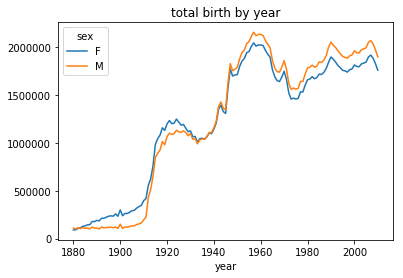

In [18]:
# use pivot_table to get a new spread sheet to get correct data
total_birth = names.pivot_table(values='births', index='year', columns='sex', aggfunc=sum)
total_birth.plot(title='total birth by year')

In [19]:
def add_prop(group):
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [20]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
# apply is meaning to apply the function into this data frame or series
top_1000 = grouped.apply(get_top1000)

In [21]:
boys = top_1000[top_1000['sex'] == 'M']
girls = top_1000[top_1000['sex'] == 'F']

/home/gordontttt/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/pivot.py:86: FutureWarning: 'year' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys, observed=False)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f38b0a82128>,
      dtype=object)

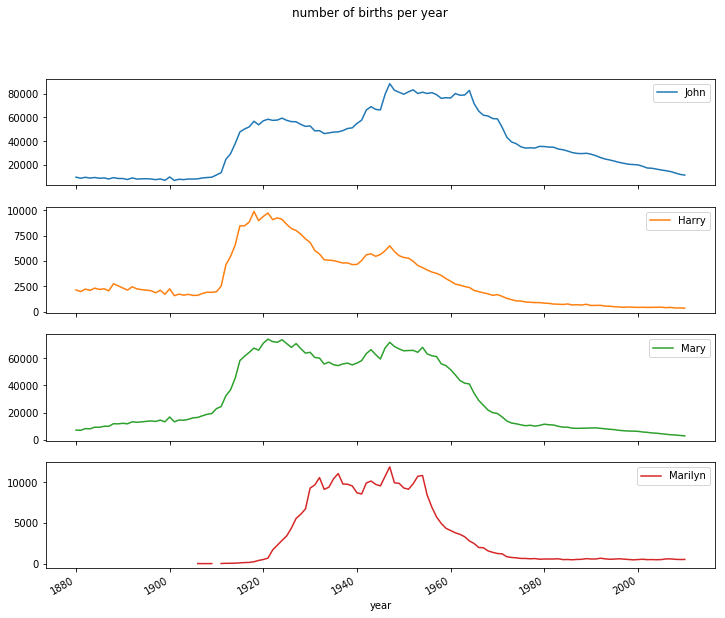

In [22]:
top_births = top_1000.pivot_table(values='births', index='year', columns='name', aggfunc=sum)
subset = top_births[['John', 'Harry', 'Mary', 'Marilyn']]
# grid means the axis grid lines
subset.plot(subplots=True, figsize=(12,10), grid=False,title='number of births per year')

/home/gordontttt/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/pivot.py:86: FutureWarning: 'sex' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys, observed=False)


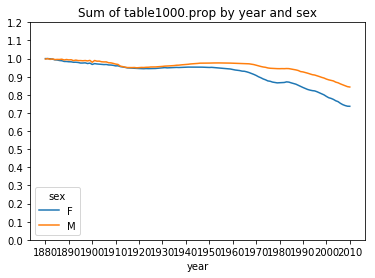

In [23]:
table = top_1000.pivot_table(values='prop', index='year', columns='sex', aggfunc=sum)
#x ticks is the sequence value to use for x, y ticks is the same idea
table.plot(title='Sum of table1000.prop by year and sex', yticks=np.linspace(0, 1.2, 13), 
           xticks=range(1880, 2020, 10))

In [24]:
df = boys[boys.year == 2010]
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
# searchsorted will find where to put the number 
prop_cumsum.searchsorted(0.5)
df = boys[boys.year == 1900]
in1990 = df.sort_values(by='prop', ascending=False).prop.cumsum()
# searchsorted will find where to put the number 
in1990.searchsorted(0.5) + 1

array([25])

In [25]:
def get_quantile_count(group, q=0.5):
    group=group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1
diversity = top_1000.groupby(['year', 'sex']).apply(get_quantile_count)
#pivot a level of the index lables, return a dataframe having a new level of column labels
# whos innter-most levle consists of the pivoted index labels
diversity = diversity.unstack('sex')
diversity['F'] = diversity['F'][0]
diversity['M'] = diversity['M'][0]
# diversity.plot(title='Number of popular names in top 50%')

/home/gordontttt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 'year' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  after removing the cwd from sys.path.
/home/gordontttt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 'sex' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  after removing the cwd from sys.path.


KeyError: 0

In [ ]:
get_last_letter = lambda x : x[-1]
# map will map values of series using input correspondence (a dict, Series, or function)
# and return a series 
last_letters = names.name.map(get_last_letter)
# define the name of the series
last_letters.name = 'last_letter'
table = names.pivot_table(values='births', index=last_letters, columns=['sex','year'],
                          aggfunc=sum)
table[:10]
#level will broadcast across a level, matchin index values on the passed MultiIndex level
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
letter_prop = subtable / subtable.sum().astype(float)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', ax=axes[0], title='Male')
# legend means tu li
letter_prop['F'].plot(kind='bar', ax=axes[1], title='Female', legend=False)

In [ ]:
letter_prop = table / table.sum().astype(float)
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T
dny_ts.plot()

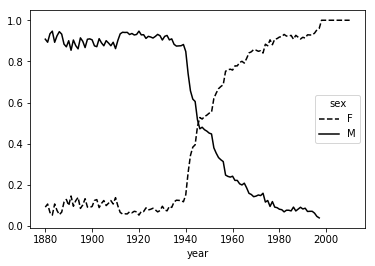

In [28]:
# return unique value of Series object
all_names = top_1000.name.unique()
mask = np.array(['lesl' in x.lower() for x in all_names])
lesley_like = all_names[mask]
filtered = top_1000[top_1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()
table = filtered.pivot_table('births', index='year', columns=['sex'], aggfunc='sum')
table = table.div(table.sum(1), axis=0)
table.plot(style={'M': 'k-', 'F': 'k--'})